# Network Data Science with NetworkX and Python

## Create and visualize sub-graphs

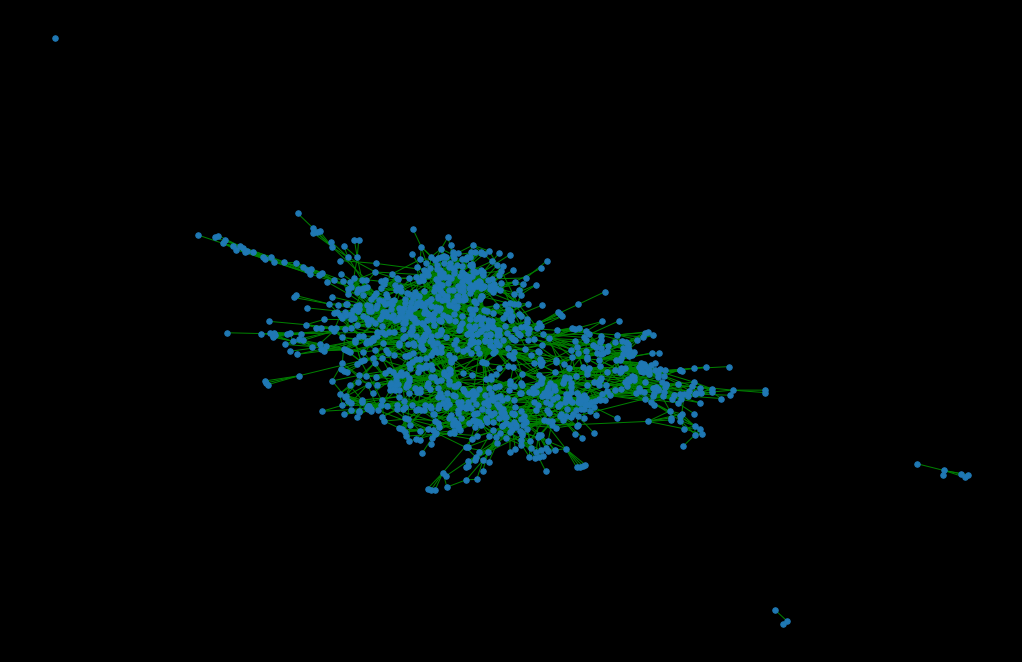

In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
from random import sample
import networkx as nx
import pandas as pd
import numpy as np

link = ('https://github.com/dnllvrvz/Social-Network-Dataset/raw/master/Social%20Network%20Dataset.xlsx')

network_data = pd.read_excel(link, sheet_name = ['Elements', 'Connections'])
elements_data = network_data['Elements'] # node list
connections_data = network_data['Connections'] # edge list
edge_cols = ['Type', 'Weight', 'When']
graph = nx.convert_matrix.from_pandas_edgelist(connections_data,
                                               source = 'From',
                                               target = 'To',
                                               edge_attr = edge_cols)

node_dict = elements_data.set_index('Label').to_dict(orient = 'index')
nx.set_node_attributes(graph, node_dict)

fig = plt.figure(figsize = (14, 9))
nx.draw(graph, 
        node_size = 30,
        edge_color = 'g')
fig.set_facecolor('k')

In [2]:
len(graph.nodes)

1193

In [3]:
len(graph.edges)

2947

In [4]:
node = sample(graph.nodes, 1)[0]
graph.nodes[node]

{'Type': 'Student', 'School (ID)': 30, 'Answered the form': 'Yes'}

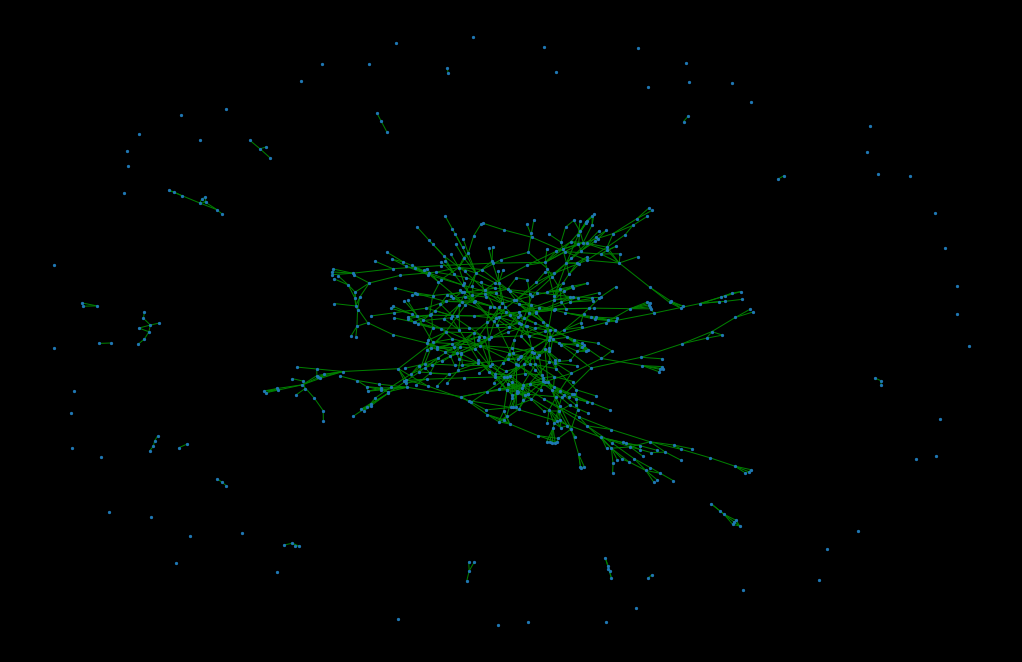

In [5]:
fig = plt.figure(figsize = (14, 9))

sampled_nodes = sample(graph.nodes, 700)
subgraph = graph.subgraph(sampled_nodes)
nx.draw(subgraph,
        node_size = 5,
        with_labels = False,
        edge_color = 'g')

fig.set_facecolor('k')

In [6]:
nodes_school_id = nx.get_node_attributes(graph,
                                         'School (ID)')
school_nodes = defaultdict(list)
for node, school_id in nodes_school_id.items():
    school_nodes[school_id].append(node)

In [7]:
school_nodes[5]

['S-82d78a', 'S-087f53']

In [8]:
graph.nodes['S-087f53']

{'Type': 'Student', 'School (ID)': 5, 'Answered the form': 'No'}

In [9]:
subgraphs = {}
for school_id, nodes in school_nodes.items():
    subgraph = graph.subgraph(nodes)
    subgraphs[school_id] = subgraph

In [10]:
subgraphs[5].nodes

NodeView(('S-82d78a', 'S-087f53'))

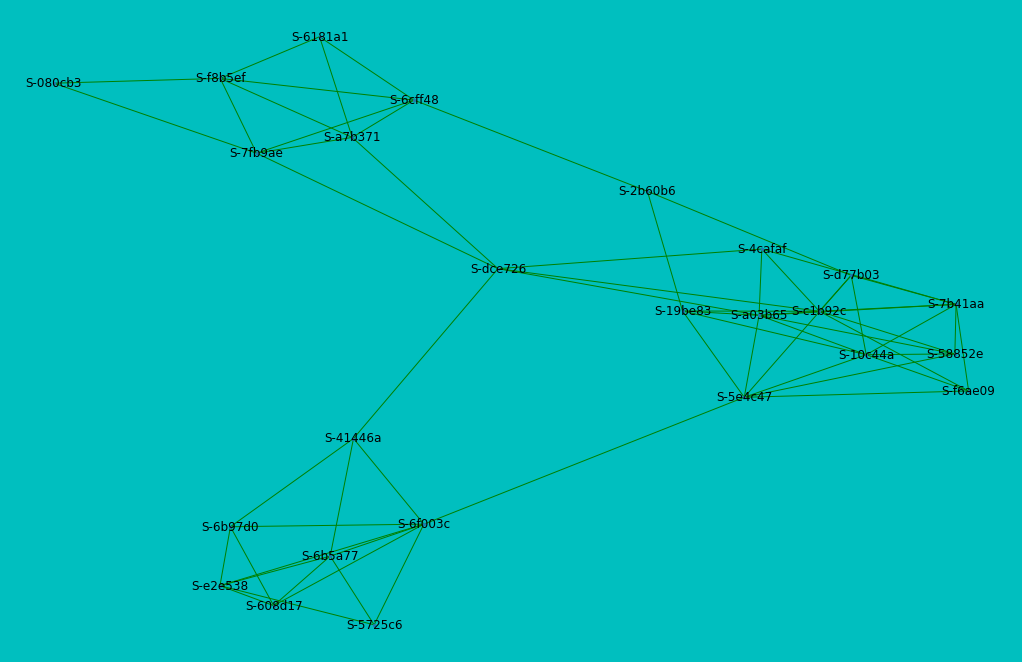

In [11]:
fig = plt.figure(figsize = (14, 9))

nx.draw(subgraphs[3],
        node_size=5,
        with_labels=True,
        edge_color = 'g')

fig.set_facecolor('c')